<a href="https://colab.research.google.com/github/mark-ortiz/03MAIR-Algoritmos-de-Optimizacion-2019/blob/master/AG3/Marco_Ortiz_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AG-Actividad Guiada3
###Nombre: Marco Antonio Ortiz Meneses
https://github.com/mark-ortiz/03MAIR-Algoritmos-de-Optimizacion-2019/tree/master/AG3

In [0]:
import urllib.request
file="swiss42.tsp"
urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp",file)


('swiss42.tsp', <http.client.HTTPMessage at 0x7fdfd51f6828>)

In [0]:
!pip install tsplib95

    100% |████████████████████████████████| 1.6MB 17.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built networkx
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2


In [0]:
import tsplib95
import random
from math import e

problem=tsplib95.load_problem(file)

#Nodos
Nodos = list(problem.get_nodes())
#Aristas
Aristas = list(problem.get_edges())

In [0]:
print("Nodos",Nodos);print("Aristas",Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [0]:
#Devuelve el factorial de un número
def factorial(n):
  if n==0:
    return 1
  else:
    return n*factorial(n-1)

#Se genera una solución aleatoria con comienzo en el nodo 0
def crear_solucion(Nodos):
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion=solucion+[random.choice(list(set(Nodos) - set({0}) - set (solucion)))]
  return solucion
 
#Devuelve la distancia entre dos nodos
def distancia(a,b,problem):
  return problem.wfunc(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion,problem):
  distancia_total=0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i],solucion[i+1],problem)
  return distancia_total+distancia(solucion[len(solucion)-1],solucion[0],problem)

solucion=crear_solucion(Nodos)

distancia_total(solucion,problem)


4661

In [0]:
def busqueda_aleatoria(problem,N):
  
  Nodos=list(problem.get_nodes())
  
  mejor_solucion=[]
  mejor_distancia=10e100
  
  for i in range(N):
    solucion=crear_solucion(Nodos)
    distancia=distancia_total(solucion,problem)
    if distancia < mejor_distancia:
      mejor_solucion=solucion
      mejor_distancia=distancia
      
  print("Mejor solución:", mejor_solucion)
  print("Distancia     :", mejor_distancia)
  
  return mejor_solucion

sol = busqueda_aleatoria(problem,50000)

Mejor solución: [0, 4, 28, 18, 5, 8, 41, 21, 40, 24, 10, 9, 29, 3, 34, 27, 31, 39, 23, 33, 2, 12, 26, 19, 14, 7, 1, 16, 15, 36, 17, 35, 37, 13, 32, 38, 30, 6, 22, 25, 11, 20]
Distancia     : 3332


In [0]:
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos
  #se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion=[]
  mejor_distancia=10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1,len(solucion)):
      vecina = solucion[:i] + [solucion[j]]+solucion[i+1:j] + [solucion[i]]+solucion[j+1:]
      distancia_vecina = distancia_total(vecina,problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia=distancia_vecina
        mejor_solucion=vecina
  return mejor_solucion

solucion=crear_solucion(Nodos)
print(solucion)

nueva_solucion=genera_vecina(solucion)
print(nueva_solucion)

[0, 6, 27, 21, 11, 17, 40, 38, 12, 29, 7, 34, 22, 18, 32, 1, 41, 14, 16, 36, 13, 35, 4, 39, 2, 25, 24, 15, 8, 23, 19, 31, 30, 37, 26, 5, 10, 9, 33, 28, 3, 20]
[0, 6, 27, 21, 11, 17, 40, 38, 12, 29, 7, 34, 22, 18, 32, 1, 15, 14, 16, 36, 13, 35, 4, 39, 2, 25, 24, 41, 8, 23, 19, 31, 30, 37, 26, 5, 10, 9, 33, 28, 3, 20]


In [0]:
def busqueda_local(problem,N):
  mejor_solucion = []
  mejor_distancia = 10e100
  Nodos=list(problem.get_nodes())
  solucion_referencia=crear_solucion(Nodos)
  for i in range(N):
    vecina=genera_vecina(solucion_referencia)
    distancia_vecina=distancia_total(vecina,problem)
    if distancia_vecina<mejor_distancia:
      mejor_solucion=vecina
      mejor_distancia=distancia_vecina
    solucion_referencia=vecina
  print("Mejor solución:", mejor_solucion)
  print("Distancia     :", mejor_distancia)
  return mejor_solucion

sol=busqueda_local(problem,100)

Mejor solución: [0, 27, 2, 8, 10, 41, 23, 22, 38, 33, 34, 32, 30, 28, 3, 6, 5, 26, 4, 29, 39, 24, 40, 21, 9, 13, 19, 14, 16, 15, 37, 17, 31, 36, 35, 20, 7, 18, 12, 11, 25, 1]
Distancia     : 1862


In [0]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la eleccción no se uniforme sino entre las
  #que estén más próximas
  i=random.choice(range(1,len(solucion)))
  j=random.choice(list(set(range(1,len(solucion)))-{i}))
  vecina=solucion[:i]+[solucion[j]]+solucion[i+1:j]+[solucion[i]]+solucion[j+1:]
  return vecina

def probabilidad(T,d):
  r=random.random()
  if(r<=(e**(-1*d)/(T*1.0))):
    return True
  else:
    return False
  
def bajar_temperatura(T):
  return T-1 

In [0]:
def recocido_simulado(problem,TEMPERATURA):
  #problem=datos del problema
  #T=Temperatura
  solucion_referencia=crear_solucion(Nodos)
  distancia_referencia=distancia_total(solucion_referencia,problem)
  mejor_solucion=[]
  mejor_distancia=10e100
  while TEMPERATURA > 0:
    #Genera una solución vecina (aleatoria)
    vecina=genera_vecina(solucion_referencia)
    #Calcula su valor(distancia)
    distancia_vecina=distancia_total(vecina,problem)
    #Si es la mejor solución de todas se guarda
    if distancia_vecina<mejor_distancia:
      mejor_solucion=vecina
      mejor_distancia=distancia_vecina
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según
    #una probabilidad dependiente de T y de distancia_referencia - distancia_vecina
    if distancia_vecina<distancia_referencia or probabilidad(TEMPERATURA,abs(distancia_referencia-distancia_vecina)):
      solucion_referencia=vecina
      distancia_referencia=distancia_vecina
    TEMPERATURA=bajar_temperatura(TEMPERATURA)
  print("La mejor solucion encontrada es ", end="")
  print(mejor_solucion)
  print("con una distancia total de ", end="")
  print(mejor_distancia)
  return mejor_solucion

sol=recocido_simulado(problem,100)      

La mejor solucion encontrada es [0, 29, 21, 40, 24, 39, 22, 38, 33, 35, 36, 31, 17, 7, 6, 26, 18, 12, 11, 25, 10, 30, 34, 20, 32, 4, 5, 13, 19, 14, 16, 15, 37, 1, 3, 27, 28, 9, 23, 41, 8, 2]
con una distancia total de 1754


In [0]:
def Add_Nodo(problem,H,T):
  #Establecer una función de probabilidad para
  #añadir un nuevo nodo dependiendo de los nodos mas cercanos 
  #y de las feromonas depositadas
  Nodos=list(problem.get_nodes())
  return random.choice(list(set(range(1,len(Nodos)))-set(H)))

def Incrementa_Feromona(problem,T,H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad
  #inversamente proporcional a la distancia total
  for i in range(len(H)-1):
    T[H[i]][H[i+1]]+=1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la
  #cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T=[[max(T[i][j]-0.3,1) for i in range(len(Nodos))] for j in range(len(Nodos))]
  return T

In [0]:
def hormigas(problem,N):
  #problem=datos del problema
  #N=Número de agentes(hormigas)
  #Nodos
  Nodos=list(problem.get_nodes())
  #Aristas
  Aristas=list(problem.get_edges())
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T=[[1 for _ in range(len(Nodos))] for _ in range(len(Nodos))]
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga=[[0] for _ in range(N)]
  #Recorre cada agente construyendo la solución
  for h in range(N):
    #print("\nAgente:",h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1):
      #Elige el siguiente nodo
      Nuevo_Nodo=Add_Nodo(problem,Hormiga[h],T)
      Hormiga[h].append(Nuevo_Nodo)
    #Incrementa feromonas en esa arista
    T=Incrementa_Feromona(problem,T,Hormiga[h])
    #print("Feromonas(1)",T)
    
    #Evapora Feromonas
    T=Evaporar_Feromonas(T)
    #print("Feromonas(2)",T)
    
    #Seleccionamos el mejor agente
  mejor_solucion=[]
  mejor_distancia=10e100
  for h in range(N):
    distancia_actual=distancia_total(Hormiga[h],problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion=Hormiga[h]
      mejor_distancia=distancia_actual
  print(mejor_solucion)
  print(mejor_distancia)
  
hormigas(problem,5000)

[0, 31, 28, 1, 25, 22, 15, 36, 33, 38, 39, 29, 2, 11, 41, 23, 5, 4, 9, 21, 10, 26, 6, 27, 12, 40, 24, 7, 20, 8, 16, 18, 19, 13, 3, 35, 17, 14, 37, 30, 34, 32]
3676


[0, 29, 21, 40, 24, 39, 22, 38, 33, 35, 36, 31, 17, 7, 6, 26, 18, 12, 11, 25, 10, 30, 34, 20, 32, 4, 5, 13, 19, 14, 16, 15, 37, 1, 3, 27, 28, 9, 23, 41, 8, 2]
[(0, 29), (29, 21), (21, 40), (40, 24), (24, 39), (39, 22), (22, 38), (38, 33), (33, 35), (35, 36), (36, 31), (31, 17), (17, 7), (7, 6), (6, 26), (26, 18), (18, 12), (12, 11), (11, 25), (25, 10), (10, 30), (30, 34), (34, 20), (20, 32), (32, 4), (4, 5), (5, 13), (13, 19), (19, 14), (14, 16), (16, 15), (15, 37), (37, 1), (1, 3), (3, 27), (27, 28), (28, 9), (9, 23), (23, 41), (41, 8), (8, 2)]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


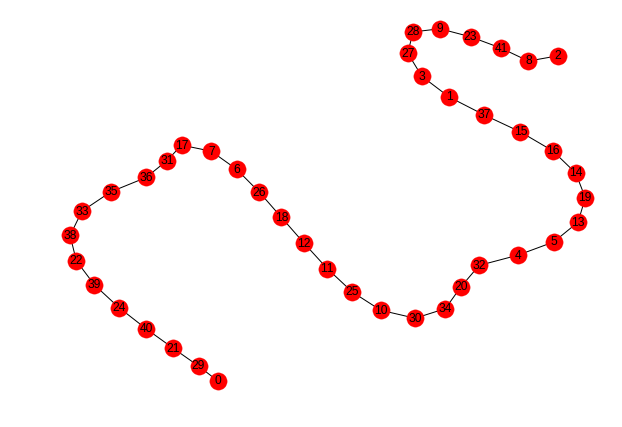

In [8]:
###########################################################################
####                    AGREGADO POR MI                                 ###
####             REPRESENTACION VISUAL DE UNA SOLUCION                  ###
####  IDEA TOMADA DEL PROFESOR Y AJUSTADA PARA QUE GRAFIQUE LA SOLUCION ###
####           ENCONTRADA POR EL ALGORITMO RECOCIDO SIMULADO            ###
###########################################################################

import matplotlib.pyplot as plt
import networkx as nx

### Tomo los valores de salida de Recocido Simulado

#Los copie directamente para rapidez y facilidad aunque se podria hacer una
#función que los ponga en una lista

Nodos=[0, 29, 21, 40, 24, 39, 22, 38, 33, 35, 36, 31, 17, 7, 6, 26, 18, 12, 11, 25, 10, 30, 34, 20, 32, 4, 5, 13, 19, 14, 16, 15, 37, 1, 3, 27, 28, 9, 23, 41, 8, 2]

#A continuación el sig. codigo crea las Aristas segun yo
Aristas=[]
for i in range(len(Nodos)-1):
  elem=(Nodos[i],Nodos[i+1])
  Aristas.append(elem)

def dibujar_grafo(Nodos,Aristas):
  G=nx.Graph()
  G.clear()
  #Dibuja los nodos
  G.add_nodes_from(Nodos)
  print(Nodos)
  #Dibuja aristas
  aristas=Aristas+[(70,1)]
  print(Aristas)
  G.add_edges_from(Aristas)
  nx.draw(G,with_labels=True,size=1000,cmap=plt.cm.Reds_r) #Le quite el random para entender y que se viera mejor

dibujar_grafo(Nodos,Aristas)  